In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import keras.optimizers
import keras.initializers

Using TensorFlow backend.


In [2]:
from numpy import linalg as LA
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.layers import Input, add
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Layer, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from sklearn.metrics import mean_squared_error

In [3]:
(trainclass, trainlabels), (testclass, testlabels) = mnist.load_data()
trainclass = trainclass.reshape(len(trainclass),28*28)
testclass = testclass.reshape(len(testclass),28*28)
trainclass = trainclass[0:10000]
testclass = testclass[0:1000]
trainlabels = trainlabels[0:10000]
testlabels = testlabels[0:1000]
testclass = testclass/255
trainclass = trainclass/255
predtrain  = keras.utils.to_categorical(trainlabels,10)
predtest  = keras.utils.to_categorical(testlabels,10)

In [4]:
temp = [10,50,100,300,400,500]
input_size = 784
hidden_size = 10
code_size = 2
epochs = 20
batch_size = 128
stores = []
decs = []
loss = []
optimizers = [keras.optimizers.SGD(learning_rate=0.01, momentum=0.0, nesterov=False),keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True),keras.optimizers.Adam(),keras.optimizers.RMSprop(),]
for j in range(len(optimizers)):
    optilosses = []
    for i in range(len(temp)):
        hidden_size = temp[i]
        code_size = temp[i]//2
        x = Input(shape=(input_size,))
        hidden_1 = Dense(hidden_size, activation='relu')(x)
        h = Dense(code_size, activation='relu')(hidden_1)
        hidden_2 = Dense(hidden_size, activation='relu')(h)
        r = Dense(input_size, activation='sigmoid')(hidden_2)

        autoencoder = Model(inputs=x, outputs=r)
        autoencoder.compile(optimizer=optimizers[j], loss='mse')
        history = autoencoder.fit(trainclass,trainclass, batch_size=batch_size, epochs=epochs, verbose=0, validation_data=(testclass,testclass))
        stores.append(history)
        pred = autoencoder.predict(testclass)
        decs.append(pred)
        loss.append(mean_squared_error(testclass,pred))
    optilosses.append(loss)

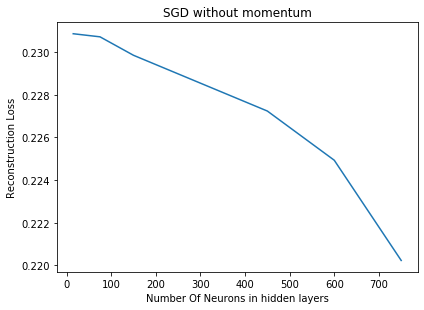

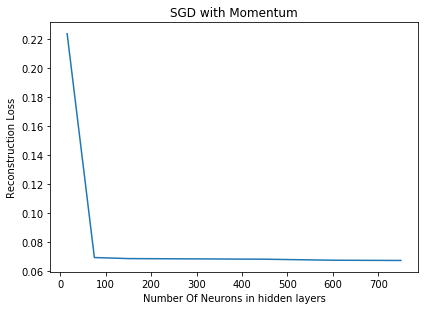

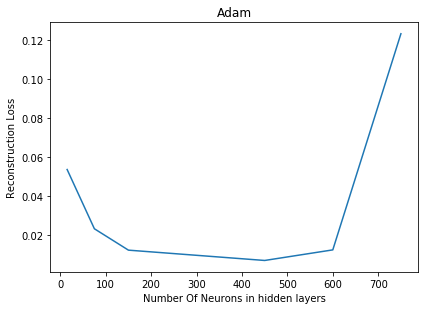

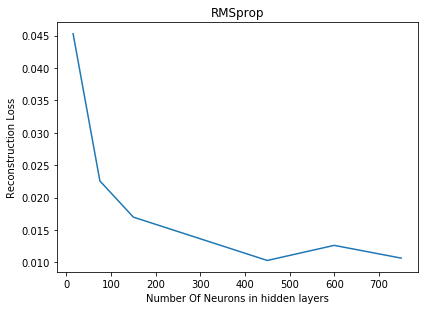

In [13]:
optilosses = []
for j in range(0,24,6):
    optilosses.append(loss[j:j+6])
neurons = [temp[i] + temp[i]//2 for i in range(len(temp))]
titles = ["SGD without momentum","SGD with Momentum","Adam","RMSprop"]
for i in range(len(optilosses)):
    plt.plot(neurons,optilosses[i])
    plt.ylabel('Reconstruction Loss')
    plt.tight_layout()
    plt.xlabel('Number Of Neurons in hidden layers')
    plt.title(titles[i])
    plt.show()